In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,fbeta_score,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [68]:
dataset=pd.read_csv('Features.csv',names=['person','time','xAxis','yAxis','zAxis','magnitude'])


In [69]:
user_list=['user1','user2','user3','user4','user5']

In [70]:
X=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values


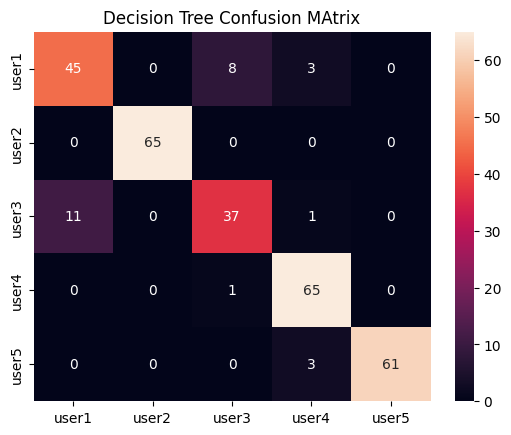

Accuracy:0.9100


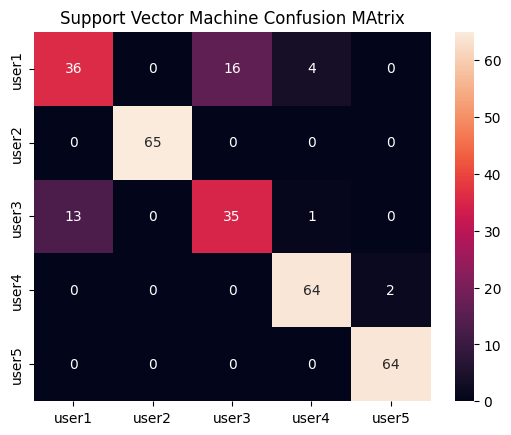

Accuracy:0.8800


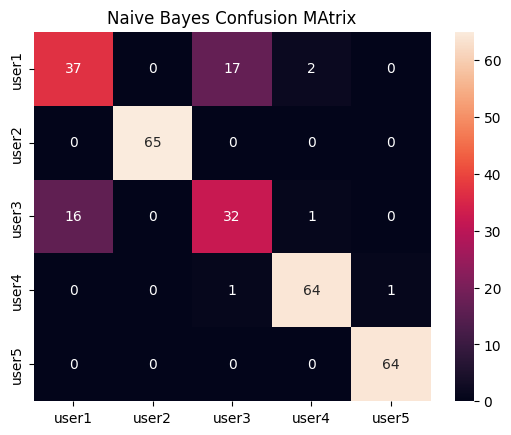

Accuracy:0.8733


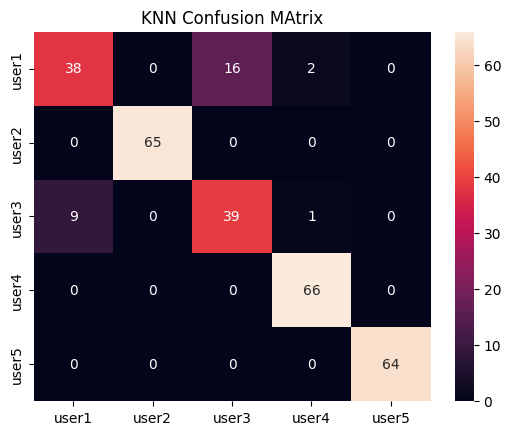

Accuracy:0.9067


In [71]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Decision Tree':DecisionTreeClassifier(),
    'Support Vector Machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'KNN':KNeighborsClassifier(n_neighbors=5)
}
model_names=models.keys()
f2_score=[]
kscore=[]
accscores=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
    scores=cross_val_score(model,X,y,cv=5)
    kscore.append(scores.mean())
    accscore=accuracy_score(y_test,y_pred)
    accscores.append(accscore)

    sns.heatmap(cm,annot=True,xticklabels=user_list,yticklabels=user_list)
    plt.title(name+' Confusion MAtrix')
    plt.show()

    print(f'{"Accuracy:"}{accscore.item():.4f}')

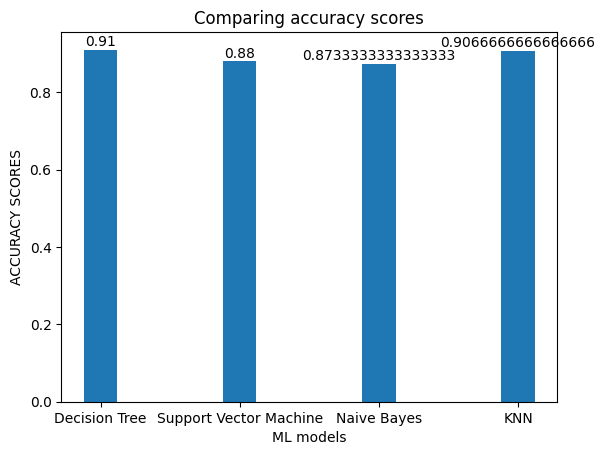

In [72]:
plt.bar(model_names,accscores,width=0.24)
plt.title('Comparing accuracy scores')
plt.xlabel('ML models')
plt.ylabel('ACCURACY SCORES')
for i, score in enumerate(accscores):
    plt.text(i, score+0.01, str(score), ha='center')
plt.show()

#### DECISION TREE  HAS BEST PERFORMANCE